In [2]:
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

# Runs on Vanderbilt server

In [3]:
df_vu = pd.DataFrame()
df_vu["ID"] = [23, 26, 69, 15, 2, 4, 3, 81, 80]
df_vu["Walltime"] = [227, 220, 218, 212, 219, 218, 228, 213, 220]
df_vu["Preprocess"] = [40, 46, 45, 42, 42, 43, 46, 38, 42]
df_vu["Segmentation"] = [129, 124, 122, 120, 125, 129, 129, 127, 125]
df_vu["Postprocess"] = [58, 50, 51, 50, 52, 46, 53, 48, 53]
df_vu["Input_size"] = [49052, 58308, 57808, 48100, 58412, 58948, 60712, 49468, 51008]
df_vu["Server"] = ["VU" for _ in range(len(df_vu))]
df_vu["Input_size"] = df_vu["Input_size"] / 1024
df_vu

,ID,Walltime,Preprocess,Segmentation,Postprocess,Input_size,Server
0,23,227,40,129,58,47.902344,VU
1,26,220,46,124,50,56.941406,VU
2,69,218,45,122,51,56.453125,VU
3,15,212,42,120,50,46.972656,VU
4,2,219,42,125,52,57.042969,VU
5,4,218,43,129,46,57.566406,VU
6,3,228,46,129,53,59.289062,VU
7,81,213,38,127,48,48.308594,VU
8,80,220,42,125,53,49.812500,VU


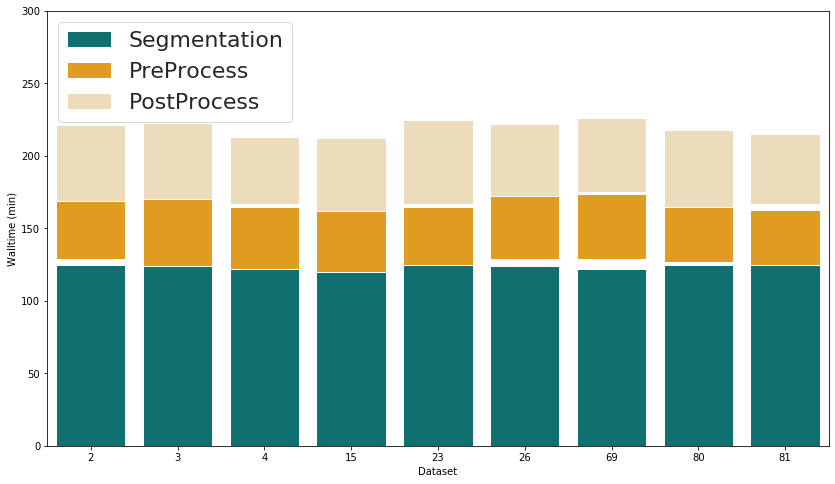

In [4]:
fig, ax = plt.subplots(figsize=(14,8))
sns.set(font_scale=2)
sns.set_style("white")

ax = sns.barplot(y="Segmentation", x="ID", color="teal", label="Segmentation",
                 data=df_vu)
ax = sns.barplot(y="Preprocess", bottom=df_vu["Segmentation"].values, x="ID",
                 color="orange", label="PreProcess", data=df_vu)
ax = sns.barplot(y="Postprocess", bottom=df_vu["Preprocess"].values + df_vu["Segmentation"].values, x="ID",
                 color="wheat", label="PostProcess", data=df_vu)



plt.legend(loc='upper left')
#plt.grid(True)
ax.set_ylim(0, 300)
ax.set_ylabel('Walltime (min)')
ax.set_xlabel('Dataset')
#plt.savefig("walltime_vu_server.png")
plt.show()

# Runs on INRIA server

In [5]:
df_fr = pd.DataFrame()
df_fr["ID"] = [23, 26, 69, 15, 2, 4, 3, 81, 80]
df_fr["Walltime"] = [126, 136, 138, 119, 123, 126, 109, 138, 138]
df_fr["Preprocess"] = [40, 47, 48, 45, 29, 28, 30, 39, 46]
df_fr["Segmentation"] = [56, 53, 53, 50, 52, 53, 55, 54, 53]
df_fr["Postprocess"] = [30, 36, 37, 24, 42, 45, 24, 45, 39]
df_fr["Input_size"] = [49052, 58308, 57808, 48100, 58412, 58948, 60712, 49468, 51008]
df_fr["Server"] = ["Inria" for _ in range(len(df_vu))]
df_fr["Input_size"] = df_fr["Input_size"] / 1024
df_fr

,ID,Walltime,Preprocess,Segmentation,Postprocess,Input_size,Server
0,23,126,40,56,30,47.902344,Inria
1,26,136,47,53,36,56.941406,Inria
2,69,138,48,53,37,56.453125,Inria
3,15,119,45,50,24,46.972656,Inria
4,2,123,29,52,42,57.042969,Inria
5,4,126,28,53,45,57.566406,Inria
6,3,109,30,55,24,59.289062,Inria
7,81,138,39,54,45,48.308594,Inria
8,80,138,46,53,39,49.812500,Inria


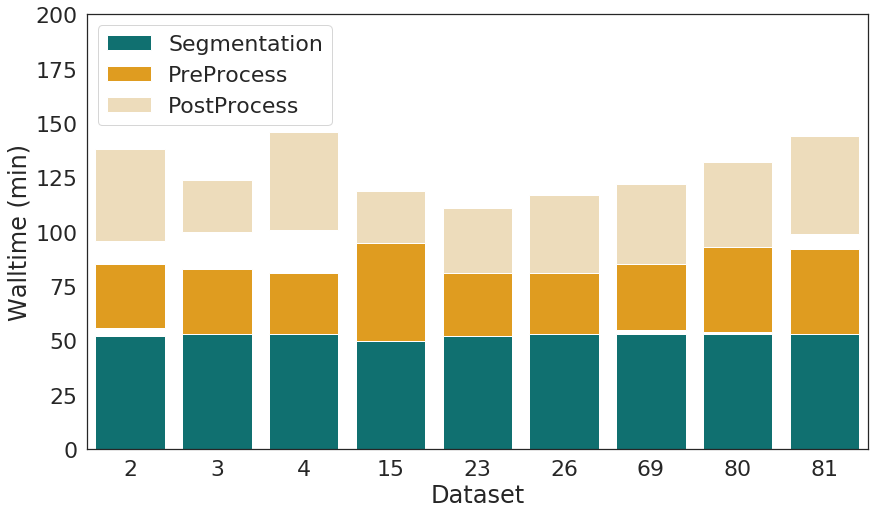

In [5]:
fig, ax = plt.subplots(figsize=(14,8))
sns.set(font_scale=2)
sns.set_style("white")

ax = sns.barplot(y="Segmentation", x="ID", color="teal", label="Segmentation",
                 data=df_fr)
ax = sns.barplot(y="Preprocess", bottom=df_fr["Segmentation"].values, x="ID",
                 color="orange", label="PreProcess", data=df_fr)
ax = sns.barplot(y="Postprocess", bottom=df_fr["Preprocess"].values + df_fr["Segmentation"].values, x="ID",
                 color="wheat", label="PostProcess", data=df_fr)



plt.legend(loc='upper left')
#plt.grid(True)
ax.set_ylim(0, 200)
ax.set_ylabel('Walltime (min)')
ax.set_xlabel('Dataset')
#plt.savefig("walltime_inria_server.png")
plt.show()

# Plot the results from both servers in one figure

In [6]:
frames = [df_vu, df_fr]
df = pd.concat(frames)
df["Preprocess"] += df["Segmentation"]
df["Postprocess"] += df["Preprocess"]
df.head()

,ID,Walltime,Preprocess,Segmentation,Postprocess,Input_size,Server
0,23,227,169,129,227,47.902344,VU
1,26,220,170,124,220,56.941406,VU
2,69,218,167,122,218,56.453125,VU
3,15,212,162,120,212,46.972656,VU
4,2,219,167,125,219,57.042969,VU


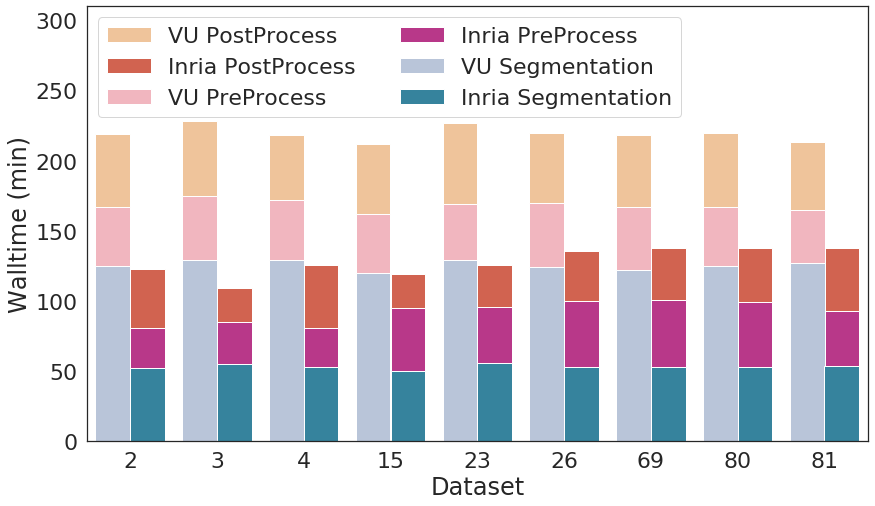

In [7]:
fig, ax = plt.subplots(figsize=(14,8))
sns.set(font_scale=2)
sns.set_style("white")

purple_pal = sns.color_palette("ch:2,r=.25,l=.7,dark=.8")

ax = sns.barplot(y="Postprocess", x="ID",
                 palette = 'OrRd', data=df, hue="Server")

sns.barplot(y="Preprocess", x="ID",
            palette = "RdPu", data=df, hue="Server")

sns.barplot(y="Segmentation", x="ID", palette = "PuBuGn",
            data=df, hue="Server")

labels=["VU PostProcess","Inria PostProcess", "VU PreProcess",
        "Inria PreProcess", "VU Segmentation", "Inria Segmentation"]
h, l = ax.get_legend_handles_labels()
ax.legend(h, labels, frameon=True, loc='upper left', ncol=2)

ax.set_ylim(0, 310)
plt.grid(False)
ax.set_ylabel('Walltime (min)')
ax.set_xlabel('Dataset')
#plt.savefig("walltime_all_server.png")
plt.show()

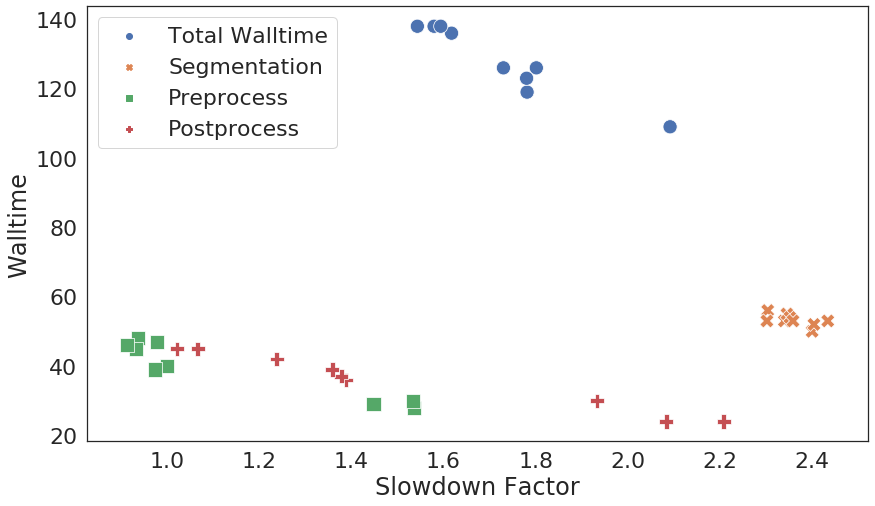

In [15]:
df = pd.DataFrame()
df["VU"] = df_vu["Walltime"]
df["Inria"] = df_fr["Walltime"]
df["Input"] = df_vu["Input_size"]
df["Slowdown"] = df_vu["Walltime"] / df_fr["Walltime"]
df["Type"] = ["Total Walltime" for i in range(len(df))]
temp = pd.DataFrame()
temp["VU"] = df_vu["Segmentation"]
temp["Input"] = df_vu["Input_size"]
temp["Inria"] = df_fr["Segmentation"]
temp["Slowdown"] = df_vu["Segmentation"] / df_fr["Segmentation"]
temp["Type"] = ["Segmentation" for i in range(len(temp))]
df = pd.concat([df, temp])
temp = pd.DataFrame()
temp["VU"] = df_vu["Preprocess"]
temp["Input"] = df_vu["Input_size"]
temp["Inria"] = df_fr["Preprocess"]
temp["Slowdown"] = df_vu["Preprocess"] / df_fr["Preprocess"]
temp["Type"] = ["Preprocess" for i in range(len(temp))]
df = pd.concat([df, temp])
temp = pd.DataFrame()
temp["VU"] = df_vu["Postprocess"]
temp["Input"] = df_vu["Input_size"]
temp["Inria"] = df_fr["Postprocess"]
temp["Slowdown"] = df_vu["Postprocess"] / df_fr["Postprocess"]
temp["Type"] = ["Postprocess" for i in range(len(temp))]
df = pd.concat([df, temp])

fig, ax = plt.subplots(figsize=(14,8))
sns.set(font_scale=2)
sns.set_style("white")

sns.scatterplot(x="Slowdown", y="Inria", hue="Type", style="Type",
                data=df[df.Type!="X"], s=200)

h,l = ax.get_legend_handles_labels()
plt.legend(h[1:],l[1:])
ax.set_xlabel('Slowdown Factor')
ax.set_ylabel('Walltime')
#plt.legend(loc='upper left')
plt.savefig("./figures/correlation_slowdown.png")
plt.show()

# Compare the results on the 2 servers

In [290]:
datasets = df_vu['ID'].unique()
slowdown = pd.DataFrame()
datasets

array([23, 26, 69, 72, 15,  2,  4,  3, 81, 80])

In [291]:
slowdown['Slowdown'] = df_vu["Preprocess"] / df_fr["Preprocess"]
slowdown['Dataset'] = df_vu['ID']
slowdown['Input'] = df_vu['Input_size']
slowdown['Stage'] = ['Preprocess' for i in range(len(df_vu))]
for d in datasets:
    vu = df_vu[df_vu.ID==d]["Preprocess"].values[0]
    inria = df_fr[df_vu.ID==d]["Preprocess"].values[0]
    print(vu/inria)

0.9302325581395349
0.9787234042553191
0.9375
0.9534883720930233
0.9333333333333333
1.4137931034482758
1.4285714285714286
0.8333333333333334
0.9743589743589743
nan


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in long_scalars
  


In [292]:
temp = pd.DataFrame()
temp['Slowdown'] = df_vu["Postprocess"] / df_fr["Postprocess"]
temp['Dataset'] = df_vu['ID']
temp['Input'] = df_vu['Input_size']
temp['Stage'] = ['Postprocess' for i in range(len(df_vu))]
slowdown = pd.concat([slowdown, temp])
for d in datasets:
    vu = df_vu[df_vu.ID==d]["Postprocess"].values[0]
    inria = df_fr[df_vu.ID==d]["Postprocess"].values[0]
    print(vu/inria)

2.1481481481481484
1.3888888888888888
1.3783783783783783
1.0952380952380953
2.1666666666666665
1.0952380952380953
1.3111111111111111
2.1666666666666665
1.0666666666666667
nan


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in long_scalars
  # Remove the CWD from sys.path while we load stuff.


In [293]:
temp = pd.DataFrame()
temp['Slowdown'] = df_vu["Segmentation"] / df_fr["Segmentation"]
temp['Dataset'] = df_vu['ID']
temp['Input'] = df_vu['Input_size']
temp['Stage'] = ['Segmentation' for i in range(len(df_vu))]
slowdown = pd.concat([slowdown, temp])
for d in datasets:
    print(df_vu[df_vu.ID==d]["Segmentation"].values[0] / df_fr[df_vu.ID==d]["Segmentation"].values[0])

2.3035714285714284
2.339622641509434
2.30188679245283
2.2280701754385963
2.5
2.480769230769231
2.4339622641509435
2.2545454545454544
2.3518518518518516
nan


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in long_scalars
  


In [294]:
temp = pd.DataFrame()
temp['Slowdown'] = (df_vu["Segmentation"] + df_vu["Preprocess"] + df_vu["Postprocess"]) / (df_fr["Segmentation"] + df_fr["Preprocess"] + df_fr["Postprocess"])
temp['Dataset'] = df_vu['ID']
temp['Input'] = df_vu['Input_size']
temp['Stage'] = ['Total' for i in range(len(df_vu))]
slowdown = pd.concat([slowdown, temp])
slowdown.head()

,Slowdown,Dataset,Input,Stage
0,0.930233,23,47.902344,Preprocess
1,0.978723,26,56.941406,Preprocess
2,0.937500,69,56.453125,Preprocess
3,0.953488,72,8.703125,Preprocess
4,0.933333,15,46.972656,Preprocess


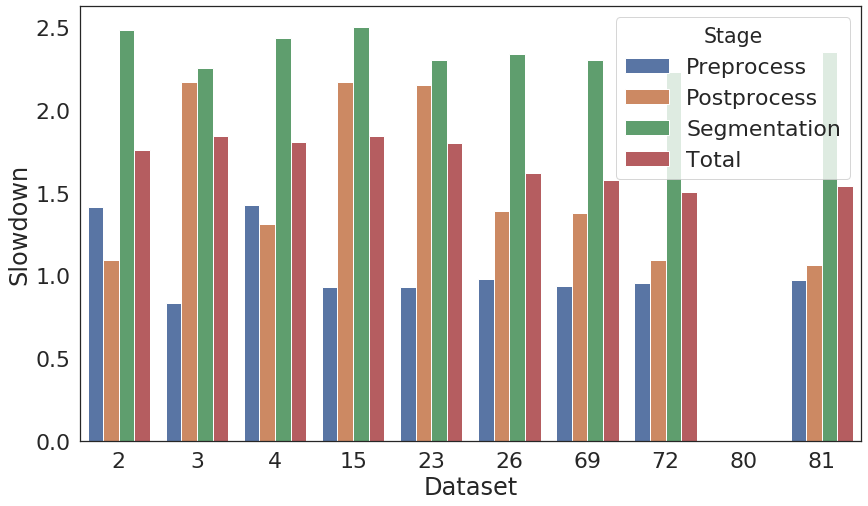

In [295]:
fig, ax = plt.subplots(figsize=(14,8))
sns.set(font_scale=2)
sns.set_style("white")

colors = ['peachpuff', 'peachpuff', 'peachpuff',
          '#97cecc', '#97cecc', '#97cecc',
          '#f98f45', '#f98f45', '#f98f45',
          '#12908e', '#12908e', '#12908e',
          '#c4421a', '#c4421a', '#c4421a',
          '#165958', '#165958', '#165958']
bar = sns.barplot(y="Slowdown", x="Dataset", 
                  data=slowdown,
                  hue="Stage")

# Loop over the bars
for i,thisbar in enumerate(bar.patches):
    # Set a different hatch for each bar
#    thisbar.set_color(colors[i])
    thisbar.set_edgecolor("white")

leg = ax.get_legend()
#leg.legendHandles[0].set_color('lightgray')
#leg.legendHandles[1].set_color('gray')
#leg.legendHandles[2].set_color('#555555')
#plt.grid(True)

ax.set_ylabel('Slowdown')
ax.set_xlabel('Dataset')
plt.savefig("walltime_all_server.png")
plt.show()

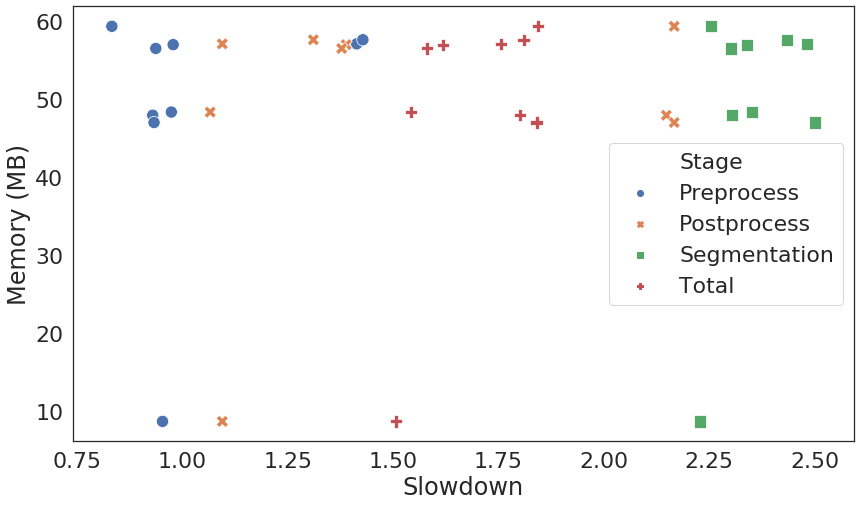

In [296]:
fig, ax = plt.subplots(figsize=(14,8))
sns.set(font_scale=2)
sns.set_style("white")

sns.scatterplot(x="Slowdown", y="Input", hue="Stage", style="Stage",
                data=slowdown, s=150)

#ax.set_ylim(0, 310)
#plt.grid(False)
ax.set_xlabel('Slowdown')
ax.set_ylabel('Memory (MB)')
#plt.savefig("walltime_all_server.png")
plt.show()

# Bandwidth

In [191]:
df = pd.DataFrame(columns=['Size', "Ctime", "Rtime", "WBW", "RBW"])
inf = open('bandwidth', 'r')
i=0
for line in inf:
    line = line.split("\n")[0].split("\t")
    try:
        size = float(line[0])
    except:
        continue
    df.loc[i] = [float(i) for i in line]
    i+=1
df

,Size,Ctime,Rtime,WBW,RBW
0,0.30,4.470,2.1390,68.724832,143.618513
1,0.55,6.699,2.9030,84.072250,194.006200
2,1.27,11.570,4.8310,112.401037,269.194784
3,3.14,19.395,7.8670,165.782934,165.782934
4,4.66,27.157,10.4110,175.713076,458.345980
5,6.31,34.820,13.2016,185.566916,489.443704
6,10.21,53.684,19.3990,194.751509,538.947368
7,11.50,58.660,20.9400,200.750085,562.368672
8,18.94,95.607,34.6740,202.857113,559.340140
9,29.27,144.965,52.5890,206.756665,569.938200


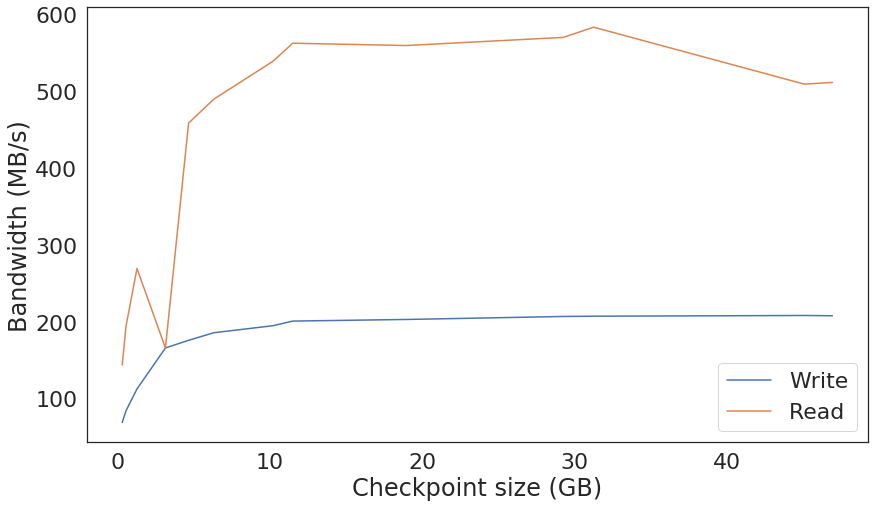

In [194]:
fig, ax = plt.subplots(figsize=(14,8))
sns.set(font_scale=2)
sns.set_style("white")

ax = sns.lineplot(x="Size", y="WBW", label='Write', data=df)
ax = sns.lineplot(x="Size", y="RBW", label='Read', data=df)

ax.set_ylabel('Bandwidth (MB/s)')
ax.set_xlabel('Checkpoint size (GB)')
#plt.savefig("walltime_all_server.png")
plt.show()